In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import io
import seaborn as sns
from os import listdir
from os.path import isfile, join
%matplotlib inline

In [3]:
def readResults(path):
    onlyfiles = [join(path,f) for f in listdir(path) if isfile(join(path, f))]
    info_pivots = {}
    query_data = []
    label = []
    
    for path in onlyfiles:
        try:
            file = open(path)
            lines = file.readlines()
            data = [line.rstrip().split(",") for line in lines]
            key = data[0][2]
            data[0].pop(2)
            value = data[0]
            info_pivots[key] = value
            data.pop(0)

            data[0] = ["Pivot"] + data[0]

            for i in range(1, len(data)):
                data[i] = [key] + data[i]

            label = data[0]
            data.pop(0)

            query_data.extend(data)

        finally:
            file.close()
    
    query_data.insert(0, label)
    data = [" ".join(line) for line in query_data]
    df = pd.read_csv(io.StringIO('\n'.join(data)), delim_whitespace=True)
    df.columns = ["Pivot", "K", "Time", "Distance Count", "Disk Access"]
    group_df = df.groupby(["Pivot", "K"])[["Distance Count", "Disk Access"]].mean().reset_index()
    return group_df
    
    

In [6]:
df_laesa = readResults("../results/laesa/")
df_kdtree = readResults("../results/kdtree/")
df_omnikdtree = readResults("../results/omnikdtree/")

In [17]:
df_omnikdtree.query("5 <= K <= 15").shape

(27, 4)

Text(0.5, 1.0, 'Distance Count - K')

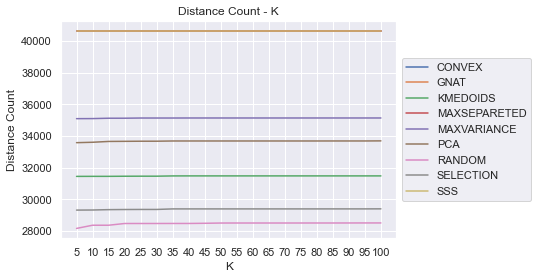

In [11]:
#Line plot
sns.set_theme()
p1 = sns.lineplot(data=df_omnikdtree, x="K", y="Distance Count", hue="Pivot")
p1.legend(loc='center left', bbox_to_anchor=(1, 0.5))
p1.set_xticks(range(5,101,5))
p1.set_title("Distance Count - K")

Text(0.5, 1.0, 'Distance Count - K')

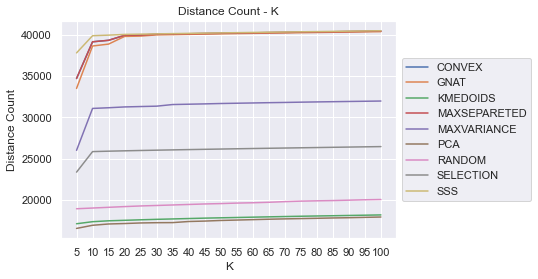

In [10]:
#Line plot
sns.set_theme()
p1 = sns.lineplot(data=df_laesa, x="K", y="Distance Count", hue="Pivot")
p1.legend(loc='center left', bbox_to_anchor=(1, 0.5))
p1.set_xticks(range(5,101,5))
p1.set_title("Distance Count - K")